<a href="https://colab.research.google.com/github/Aditya6122/Drone-View-Object-Detection/blob/main/Custom_CNN_for_Drone_Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install roboflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="tbwjbJaqSTCkdlcH4sVH")
project = rf.workspace("aditya-imsui").project("object-detection-hd")
dataset = project.version(20).download("voc")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to object-detection---HD-20 in voc:: 100%|██████████| 4352/4352 [00:00<00:00, 5003.44it/s]


In [ ]:
import os

In [ ]:
train_path = '/content/object-detection---HD-20/train'
val_path = '/content/object-detection---HD-20/valid'
train = sorted(os.listdir(train_path))
val = sorted(os.listdir(val_path))

In [ ]:
train_annotations = [i for i in train if i[-3:]=='xml']
train_imgs = [i for i in train if i[-3:]=='jpg']
val_annotations = [i for i in val if i[-3:]=='xml']
val_imgs = [i for i in val if i[-3:]=='jpg']

In [ ]:
for i in range(len(train_annotations)):
    os.rename(os.path.join(train_path,train_imgs[i]),os.path.join(train_path,'image'+str(i).zfill(5)+'.jpg'))
    os.rename(os.path.join(train_path,train_annotations[i]),os.path.join(train_path,'annotation'+str(i).zfill(5)+'.xml'))

In [ ]:
for i in range(len(val_annotations)):
    os.rename(os.path.join(val_path,val_imgs[i]),os.path.join(val_path,'image'+str(i).zfill(5)+'.jpg'))
    os.rename(os.path.join(val_path,val_annotations[i]),os.path.join(val_path,'annotation'+str(i).zfill(5)+'.xml'))

In [ ]:
train = sorted(os.listdir(train_path))
train_annotations = [i for i in train if i[-3:]=='xml']
train_imgs = [i for i in train if i[-3:]=='jpg']

In [ ]:
val = sorted(os.listdir(val_path))
val_annotations = [i for i in val if i[-3:]=='xml']
val_imgs = [i for i in val if i[-3:]=='jpg']

In [ ]:
len(train_annotations),len(train_imgs)

(2094, 2094)

In [ ]:
len(val_annotations),len(val_imgs)

(80, 80)

In [ ]:
!rm -rf /content/data
!mkdir /content/data
!mkdir /content/data/train
!mkdir /content/data/val
!mkdir /content/data/train/images
!mkdir /content/data/train/annotations
!mkdir /content/data/val/images
!mkdir /content/data/val/annotations

In [ ]:
new_train_annot_path = '/content/data/train/annotations'
new_train_imgs_path = '/content/data/train/images'
new_val_annot_path = '/content/data/val/annotations'
new_val_imgs_path = '/content/data/val/images'

In [ ]:
import shutil
for i in range(len(train_annotations)):
    shutil.copyfile(os.path.join(train_path,train_annotations[i]), os.path.join(new_train_annot_path,train_annotations[i]))
    shutil.copyfile(os.path.join(train_path,train_imgs[i]), os.path.join(new_train_imgs_path,train_imgs[i]))

In [ ]:
for i in range(len(val_annotations)):
    shutil.copyfile(os.path.join(val_path,val_annotations[i]), os.path.join(new_val_annot_path,val_annotations[i]))
    shutil.copyfile(os.path.join(val_path,val_imgs[i]), os.path.join(new_val_imgs_path,val_imgs[i]))

In [ ]:
from PIL import Image
import xml.etree.ElementTree as ET

In [ ]:
!rm -rf /content/drive/MyDrive/Objectdetection/image_classification/data/
!mkdir /content/drive/MyDrive/Objectdetection/image_classification/data/
!rm -rf /content/drive/MyDrive/Objectdetection/image_classification/.ipynb_checkpoints
!mkdir /content/drive/MyDrive/Objectdetection/image_classification/data/train
!mkdir /content/drive/MyDrive/Objectdetection/image_classification/data/val


!mkdir /content/drive/MyDrive/Objectdetection/image_classification/data/train/car
!mkdir /content/drive/MyDrive/Objectdetection/image_classification/data/train/pedestrain
!mkdir /content/drive/MyDrive/Objectdetection/image_classification/data/train/tree
!mkdir /content/drive/MyDrive/Objectdetection/image_classification/data/train/motorcycle

!mkdir /content/drive/MyDrive/Objectdetection/image_classification/data/val/car
!mkdir /content/drive/MyDrive/Objectdetection/image_classification/data/val/pedestrain
!mkdir /content/drive/MyDrive/Objectdetection/image_classification/data/val/tree
!mkdir /content/drive/MyDrive/Objectdetection/image_classification/data/val/motorcycle

In [ ]:
root = '/content/data/train'

imgs = os.listdir(os.path.join(root,"images"))
annots = os.listdir(os.path.join(root,"annotations"))

img_path = []
annot_path = []
for i in range(len(imgs)):
    img_path.append(os.path.join(root,"images",imgs[i]))
    annot_path.append(os.path.join(root,"annotations",annots[i]))

img_path = list(sorted(img_path))
annot_path = list(sorted(annot_path))


saved_root = '/content/drive/MyDrive/Objectdetection/image_classification/data/train'

last = {'tree':-1,'pedestrain':-1,'car':-1,'motorcycle':-1}

for idx in range(len(img_path)):
    img = Image.open(img_path[idx]).convert("RGB")
    tree = ET.parse(annot_path[idx])
    root = tree.getroot()

    for obj in root.findall('.//object'):
        label = obj.find('name').text
        
    last[label]+=1
    img.save(os.path.join(saved_root,label,str(label)+str(last[label]).zfill(5)+'.jpg'))
    img.close()

In [ ]:
root = '/content/data/val'

imgs = os.listdir(os.path.join(root,"images"))
annots = os.listdir(os.path.join(root,"annotations"))

img_path = []
annot_path = []
for i in range(len(imgs)):
    img_path.append(os.path.join(root,"images",imgs[i]))
    annot_path.append(os.path.join(root,"annotations",annots[i]))

img_path = list(sorted(img_path))
annot_path = list(sorted(annot_path))


saved_root = '/content/drive/MyDrive/Objectdetection/image_classification/data/val'

last = {'tree':-1,'pedestrain':-1,'car':-1,'motorcycle':-1}

for idx in range(len(img_path)):
    img = Image.open(img_path[idx]).convert("RGB")
    tree = ET.parse(annot_path[idx])
    root = tree.getroot()

    for obj in root.findall('.//object'):
        label = obj.find('name').text
        
    last[label]+=1
    img.save(os.path.join(saved_root,label,str(label)+str(last[label]).zfill(5)+'.jpg'))
    img.close()

In [ ]:
print("car :",len(os.listdir('/content/drive/MyDrive/Objectdetection/image_classification/data/train/car')))
print("motorcyle :",len(os.listdir('/content/drive/MyDrive/Objectdetection/image_classification/data/train/motorcycle')))
print("pedestrain :",len(os.listdir('/content/drive/MyDrive/Objectdetection/image_classification/data/train/pedestrain')))
print("tree :",len(os.listdir('/content/drive/MyDrive/Objectdetection/image_classification/data/train/tree')))

car : 1106
motorcyle : 261
pedestrain : 318
tree : 409


In [ ]:
print("car :",len(os.listdir('/content/drive/MyDrive/Objectdetection/image_classification/data/val/car')))
print("motorcyle :",len(os.listdir('/content/drive/MyDrive/Objectdetection/image_classification/data/val/motorcycle')))
print("pedestrain :",len(os.listdir('/content/drive/MyDrive/Objectdetection/image_classification/data/val/pedestrain')))
print("tree :",len(os.listdir('/content/drive/MyDrive/Objectdetection/image_classification/data/val/tree')))

car : 44
motorcyle : 8
pedestrain : 20
tree : 8


In [ ]:
!rm -rf /content/data
!cp -r /content/drive/MyDrive/Objectdetection/image_classification/data /content

#### Model Making

In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(256),
        # transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


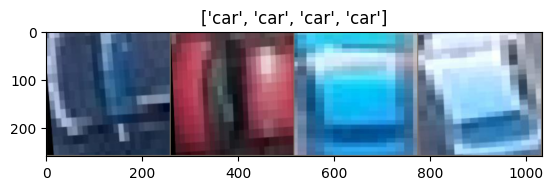

In [ ]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) 

inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
model_ft = models.mobilenet_v2(weights='DEFAULT')
num_ftrs = model_ft.classifier[1].in_features
model_ft.classifier[1] = nn.Linear(num_ftrs,4)
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9,weight_decay = 0.000001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

Epoch 0/9
----------
train Loss: 0.7087 Acc: 0.7440
val Loss: 0.4345 Acc: 0.8750

Epoch 1/9
----------
train Loss: 0.4876 Acc: 0.8376
val Loss: 0.3760 Acc: 0.8625

Epoch 2/9
----------
train Loss: 0.4192 Acc: 0.8625
val Loss: 0.4694 Acc: 0.8750

Epoch 3/9
----------
train Loss: 0.3327 Acc: 0.8859
val Loss: 0.3158 Acc: 0.9125

Epoch 4/9
----------
train Loss: 0.3083 Acc: 0.9045
val Loss: 0.2281 Acc: 0.9125

Epoch 5/9
----------
train Loss: 0.2609 Acc: 0.9117
val Loss: 0.2849 Acc: 0.9125

Epoch 6/9
----------
train Loss: 0.2669 Acc: 0.9074
val Loss: 0.1194 Acc: 0.9625

Epoch 7/9
----------
train Loss: 0.2121 Acc: 0.9312
val Loss: 0.1954 Acc: 0.9375

Epoch 8/9
----------
train Loss: 0.2178 Acc: 0.9312
val Loss: 0.2034 Acc: 0.9125

Epoch 9/9
----------
train Loss: 0.2387 Acc: 0.9226
val Loss: 0.2554 Acc: 0.8875

Training complete in 4m 3s
Best val Acc: 0.962500


In [ ]:
torch.save(model_ft.state_dict(), '/content/model_image_classification_mobilenet_v2.pt')

In [ ]:
!cp /content/model_image_classification_mobilenet_v2.pt /content/drive/MyDrive/Objectdetection/image_classification